

## HACKATHON 4 HOPE 2019:  Exploring Additional Country Demographics for Context

In [1]:
## Author:  Heather Capell
## Team:    Jon Strunk, Ursula Saelzler, Heather Capell

### In addition to Hackathon datasets, we explored the following additional sources:

### Illegal Alien stats:  www.dhs.gov/immigration-statistics# (Department of Homeland Security) 
### Population, Poverty, HDI, GDP, Battle Death stats:  www.gapminder.org/data/ (Gapminder World Data)

### LOAD ANY PACKAGES MAY NEED

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from numpy.linalg import matrix_rank

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import math

import matplotlib.pyplot as plt
import seaborn as sns

### LOAD HACKATHON DATASET ON hUMAN TRAFFICKING

In [3]:
df = pd.read_csv('./../datasets/Data D4H19 - AHT Sept 2018.csv', low_memory=False)

In [4]:
df.head()

,yearOfRegistration,Datasource,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlDebtBondage,meansOfControlTakesEarnings,...,typeOfSexPrivateSexualServices,typeOfSexConcatenated,isAbduction,RecruiterRelationship,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown
0,2002,Case Management,-99,-99,-99,-99,-99,-99,-99,-99,...,-99,-99,-99,Unknown,-99,0,0,0,0,1
1,2002,Case Management,-99,-99,-99,-99,-99,-99,-99,-99,...,-99,-99,-99,Unknown,-99,0,0,0,0,1
2,2002,Case Management,-99,-99,-99,-99,-99,-99,-99,-99,...,-99,-99,-99,Unknown,-99,0,0,0,0,1
3,2002,Case Management,-99,-99,-99,-99,-99,-99,-99,-99,...,-99,-99,-99,Unknown,-99,0,0,0,0,1
4,2002,Case Management,-99,-99,-99,-99,-99,-99,-99,-99,...,-99,-99,-99,Unknown,-99,0,0,0,0,1


In [5]:
df.shape

(55434, 62)

### EXAMINE TRAFFICKING OCCURRING IN US ONLY

In [6]:
## narrow focus to US only

df_US = df[df['CountryOfExploitation'] == 'US']

In [7]:
df_US.shape

(16956, 62)

In [8]:
df_US.head()

,yearOfRegistration,Datasource,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlDebtBondage,meansOfControlTakesEarnings,...,typeOfSexPrivateSexualServices,typeOfSexConcatenated,isAbduction,RecruiterRelationship,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown
20889,2015,Hotline,Female,18--20,Adult,Adult,Unknown,US,-99,-99,...,0,Prostitution,0,Intimate Partner,US,1,0,0,0,0
20890,2015,Hotline,Female,18--20,Adult,Adult,Unknown,US,1,-99,...,0,Prostitution,0,Other,US,0,0,0,1,0
20891,2015,Hotline,Female,18--20,Adult,Adult,Adult,US,-99,-99,...,0,Prostitution,0,Intimate Partner,US,1,0,0,0,0
20892,2015,Hotline,Female,18--20,Adult,Adult,Unknown,US,-99,-99,...,0,Prostitution,0,Friend,US,0,1,0,0,0
20893,2015,Hotline,Female,18--20,Adult,Minor,Unknown,US,-99,1,...,0,Prostitution,0,Family/Relative,US,0,0,1,0,0


In [9]:
## group by citizenship (country of origin) of Trafficking victims

df_US_sum = df_US['CountryOfExploitation'].groupby(df_US['citizenship']).count()

In [10]:
df_US_sum.head()

citizenship
CN    115
HT     13
IN     15
KR     12
MX    444
Name: CountryOfExploitation, dtype: int64

In [11]:
df_US_sum = df_US_sum.to_frame()

In [12]:
df_US_sum.columns.values[0] = 'Citizen_counts'

In [13]:
df_US_sum

,Citizen_counts
citizenship,
CN,115
HT,13
IN,15
KR,12
MX,444
PH,46
SV,11
US,4159
ZZ,12141


In [14]:
df_US_sum.shape

(9, 1)

In [15]:
## calculate each country of origin's % of all reported trafficking cases in US

df_US_sum['trafficking_US_pcnt'] = df_US_sum['Citizen_counts']/sum(df_US_sum['Citizen_counts'])

In [16]:
## calculate each country of origin's % of all reported trafficking cases in US (with citizenship known/indicated)

df_US_sum['trafficking_US_known_country_pcnt'] = df_US_sum['Citizen_counts']/  ( (sum(df_US_sum['Citizen_counts']))  - 12141)

In [17]:
df_US_sum.head()

,Citizen_counts,trafficking_US_pcnt,trafficking_US_known_country_pcnt
citizenship,,,
CN,115,0.006782,0.023884
HT,13,0.000767,0.002700
IN,15,0.000885,0.003115
KR,12,0.000708,0.002492
MX,444,0.026185,0.092212


In [18]:
df_US_sum = df_US_sum.reset_index()

In [19]:
df_US_sum.head()

,citizenship,Citizen_counts,trafficking_US_pcnt,trafficking_US_known_country_pcnt
0,CN,115,0.006782,0.023884
1,HT,13,0.000767,0.002700
2,IN,15,0.000885,0.003115
3,KR,12,0.000708,0.002492
4,MX,444,0.026185,0.092212


In [20]:
## add a country code lookup

df_country = pd.read_csv('./../datasets/country_codes.csv')

In [21]:
df_US_traffick = pd.merge(left = df_US_sum, right = df_country, left_on = df_US_sum['citizenship'], right_on = df_country['country_code'], how = 'outer')

In [22]:
df_US_traffick.head()

,key_0,citizenship,Citizen_counts,trafficking_US_pcnt,trafficking_US_known_country_pcnt,country_code,country,country_code.1
0,CN,CN,115.0,0.006782,0.023884,CN,China,CN
1,HT,HT,13.0,0.000767,0.002700,HT,Haiti,HT
2,IN,IN,15.0,0.000885,0.003115,IN,India,IN
3,KR,KR,12.0,0.000708,0.002492,KR,"Korea, Republic of",KR
4,MX,MX,444.0,0.026185,0.092212,MX,Mexico,MX


In [23]:
df_US_traffick.drop(['key_0', 'country_code.1'], axis=1).head()

,citizenship,Citizen_counts,trafficking_US_pcnt,trafficking_US_known_country_pcnt,country_code,country
0,CN,115.0,0.006782,0.023884,CN,China
1,HT,13.0,0.000767,0.002700,HT,Haiti
2,IN,15.0,0.000885,0.003115,IN,India
3,KR,12.0,0.000708,0.002492,KR,"Korea, Republic of"
4,MX,444.0,0.026185,0.092212,MX,Mexico


In [24]:
df_US_traffick.to_csv('./../datasets/US_trafficking_sums-2015-2017.csv')

### BRING IN ILLEGAL ALIENS DATASET

In [25]:
df_ill = pd.read_csv('./../datasets/Illegal aliens in US - dhs.gov.csv', sep='\s*,\s*')

C:\Users\ekvtjdx\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [26]:
df_ill.head()

,Country,country_code,Illegal aliens in US - mill (2015),% of US Illegal aliens (2015)
0,Mexico,MX,6.58,55.0
1,El Salvador,SV,0.75,6.3
2,Guatemala,GT,0.62,5.2
3,India,IN,0.47,3.9
4,Honduras,HN,0.44,3.7


In [27]:
df_ill['illeg_US_pcnt'] = df_ill['% of US Illegal aliens (2015)']*.01

In [28]:
df_ill.head()

,Country,country_code,Illegal aliens in US - mill (2015),% of US Illegal aliens (2015),illeg_US_pcnt
0,Mexico,MX,6.58,55.0,0.550
1,El Salvador,SV,0.75,6.3,0.063
2,Guatemala,GT,0.62,5.2,0.052
3,India,IN,0.47,3.9,0.039
4,Honduras,HN,0.44,3.7,0.037


In [29]:
## MERGE US TRAFFICKING DATASET WITH ILLEGAL ALIENS DATASET

df_combo = pd.merge(left = df_US_sum, right = df_ill, left_on = df_US_sum['citizenship'], right_on = df_ill['country_code'], how = 'outer')

In [30]:
df_combo.head()

,key_0,citizenship,Citizen_counts,trafficking_US_pcnt,trafficking_US_known_country_pcnt,Country,country_code,Illegal aliens in US - mill (2015),% of US Illegal aliens (2015),illeg_US_pcnt
0,CN,CN,115.0,0.006782,0.023884,China,CN,0.32,2.7,0.027
1,HT,HT,13.0,0.000767,0.002700,NaN,NaN,NaN,NaN,NaN
2,IN,IN,15.0,0.000885,0.003115,India,IN,0.47,3.9,0.039
3,KR,KR,12.0,0.000708,0.002492,Korea,KR,0.23,1.9,0.019
4,MX,MX,444.0,0.026185,0.092212,Mexico,MX,6.58,55.0,0.550


In [31]:
df_combo.drop('key_0', axis =1, inplace=True)

### BRING IN POVERTY DATASET

In [32]:
df_pov = pd.read_csv('./../datasets/number_of_people_in_poverty.csv', low_memory=False)

In [33]:
df_pov['pov_in_mill'] = df_pov['2010']

In [34]:
df_pov = df_pov[['country','pov_in_mill']]

In [35]:
df_pov.head()

,country,pov_in_mill
0,Albania,NaN
1,Algeria,NaN
2,Angola,NaN
3,Argentina,0.6990
4,Armenia,0.0741


### BRING IN POPULATION DATASET

In [36]:
df_pop = pd.read_csv('./../datasets/population_total.csv', low_memory=False)

In [37]:
df_pop['pop-2015'] = df_pop['2015']

In [38]:
df_pop = df_pop[['country','pop-2015']]

In [39]:
df_pop['pop-mill-2015'] = df_pop['pop-2015']/1000000

In [40]:
df_pop.head()

,country,pop-2015,pop-mill-2015
0,Afghanistan,33700000,33.700
1,Albania,2920000,2.920
2,Algeria,39900000,39.900
3,Andorra,78000,0.078
4,Angola,27900000,27.900


In [41]:
## MERGE POVERTY DATASET WITH POPULATION DATASET - to get percent of population in poverty

df_pov = pd.merge(left = df_pov, right = df_pop, left_on = df_pov['country'], right_on = df_pop['country'], how = 'outer')

In [42]:
df_pov.head()

,key_0,country_x,pov_in_mill,country_y,pop-2015,pop-mill-2015
0,Albania,Albania,NaN,Albania,2920000,2.92
1,Algeria,Algeria,NaN,Algeria,39900000,39.90
2,Angola,Angola,NaN,Angola,27900000,27.90
3,Argentina,Argentina,0.6990,Argentina,43400000,43.40
4,Armenia,Armenia,0.0741,Armenia,2920000,2.92


In [43]:
df_pov.drop('key_0', axis =1, inplace=True)

In [44]:
## Only want to show rows that have both Povery and Population data

df_pov =df_pov.dropna()

In [45]:
df_pov['poverty_pop_pcnt'] = df_pov['pov_in_mill']/df_pov['pop-mill-2015']

In [46]:
## MERGE TRAFFICKING & ILLEGAL ALIEN DATASETS WITH POVERTY DATASET

df_combo_more = pd.merge(left = df_combo, right = df_pov, left_on = df_combo['Country'], right_on = df_pov['country_x'], how = 'outer')

In [47]:
df_combo_more.head(10)

,key_0,citizenship,Citizen_counts,trafficking_US_pcnt,trafficking_US_known_country_pcnt,Country,country_code,Illegal aliens in US - mill (2015),% of US Illegal aliens (2015),illeg_US_pcnt,country_x,pov_in_mill,country_y,pop-2015,pop-mill-2015,poverty_pop_pcnt
0,China,CN,115.0,0.006782,0.023884,China,CN,0.32,2.7,0.027,China,123.000,China,1.400000e+09,1400.00,0.087857
1,NaN,HT,13.0,0.000767,0.002700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,US,4159.0,0.245282,0.863759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,ZZ,12141.0,0.716030,2.521495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,India,IN,15.0,0.000885,0.003115,India,IN,0.47,3.9,0.039,India,389.000,India,1.310000e+09,1310.00,0.296947
5,Korea,KR,12.0,0.000708,0.002492,Korea,KR,0.23,1.9,0.019,NaN,NaN,NaN,NaN,NaN,NaN
6,Mexico,MX,444.0,0.026185,0.092212,Mexico,MX,6.58,55.0,0.550,Mexico,0.849,Mexico,1.260000e+08,126.00,0.006738
7,Philippines,PH,46.0,0.002713,0.009553,Philippines,PH,0.37,3.1,0.031,NaN,NaN,NaN,NaN,NaN,NaN
8,El Salvador,SV,11.0,0.000649,0.002285,El Salvador,SV,0.75,6.3,0.063,El Salvador,0.322,El Salvador,6.310000e+06,6.31,0.051030
9,Guatemala,NaN,NaN,NaN,NaN,Guatemala,GT,0.62,5.2,0.052,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
df_combo_more.drop('key_0', axis =1, inplace=True)

### KEY METRICS TO DISCOVER IF RELATED TO TRAFFICKING

In [49]:
df_hypo = df_combo_more[['citizenship', 'illeg_US_pcnt', 'poverty_pop_pcnt', 'trafficking_US_pcnt']]

In [50]:
df_hypo.shape

(71, 4)

In [51]:
df_hypo.head()

,citizenship,illeg_US_pcnt,poverty_pop_pcnt,trafficking_US_pcnt
0,CN,0.027,0.087857,0.006782
1,HT,NaN,NaN,0.000767
2,US,NaN,NaN,0.245282
3,ZZ,NaN,NaN,0.716030
4,IN,0.039,0.296947,0.000885


In [52]:
## want to look at rows where all 4 variables have a value, so can look at relationship 

df_hypo_notnull = df_hypo.dropna()

### NOT ENOUGH DATA TO ESTABLISH ANY RELATIONSHIPS STATISTICALLY !!!

In [53]:
df_hypo_notnull.shape

(4, 4)

In [54]:
df_hypo_notnull

,citizenship,illeg_US_pcnt,poverty_pop_pcnt,trafficking_US_pcnt
0,CN,0.027,0.087857,0.006782
4,IN,0.039,0.296947,0.000885
6,MX,0.550,0.006738,0.026185
8,SV,0.063,0.051030,0.000649


In [55]:
X = df_hypo_notnull.drop('citizenship', axis=1)

In [56]:
## looking for correlation between the values

for i, col in enumerate(X.columns):
    print('VIF {}: {}'.format(col,variance_inflation_factor(X.values,i)))
    
## High VIF (5-10 or higher) indicates high correlation between column and one or more column(s)

VIF illeg_US_pcnt: 19.98306173340889
VIF poverty_pop_pcnt: 1.0162144338457426
VIF trafficking_US_pcnt: 20.012996687717596


In [57]:
## trying to explain human trafficking - what makes a country of origin ('citizenship') have a high % of trafficking in US

y = X['trafficking_US_pcnt']

In [58]:
## using illegal aliens and poverty as explainatory factors

X = X.drop('trafficking_US_pcnt', axis=1)

In [59]:
X.shape

(4, 2)

In [60]:
y.shape

(4,)

### MODELING SECTION BELOW IS JUST FOR FUN (not enough data)

In [61]:
## looking for linear relationship b/n US Trafficking and Countries with High Poverty and High % of Illegal ALiens in US

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y)

In [63]:
def linear_regressor(X_train, X_test, y_train, y_test):
    """
    Create a linear regression model using sklearn. 
    
    INPUTS: X_train, X_test, y_train, y_test
    OUTPUTS: R-squared value, cross-validated R-squared value 
    """
    # instantiate the model
    lr = LinearRegression()
    
    # fit the linear regression model to the training data
    lr.fit(X_train, y_train)
    
    # predict on the unseen test set
    y_pred = lr.predict(X_test)
    
    # print the R-squared value and cross-validated R-squared value
    print('R-squared: {}'.format(r2_score(y_test, y_pred)))
    print('CV score: {}'.format(np.mean(cross_val_score(lr, X_train, y_train, scoring='r2', cv=3))))

In [64]:
linear_regressor(X_train, X_test, y_train, y_test)

R-squared: 0.0
CV score: 0.0


In [65]:
linear_regressor(X, X_test, y, y_test)

R-squared: 0.0
CV score: -1.0834834014073662


In [66]:
def plot_performances(X_train, X_test, y_train, y_test):
    """
    Plot the performances of the linear regressor. 
    
    INPUTS: X_train, X_test, y_train, y_test
    OUTPUTS:
    - R-squared values
    - plot of test set performance (y_true vs. y_pred)
    - plot of train set performance (y_true vs. y_pred)
    """
    # model test and train set separately
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    model_test = pd.DataFrame({'y_test': y_test, 'y_pred': lr.predict(X_test)})
    model_train = pd.DataFrame({'y_train': y_train, 'y_pred': lr.predict(X_train)})
    
    # print R-squared values for test and train set
    print('Test R-squared: {}'.format(r2_score(y_test, lr.predict(X_test))))
    print('Train R-squared: {}'.format(r2_score(y_train, lr.predict(X_train))))
    
    # plot performance of test set
    sns.lmplot(x='y_pred', y='y_test', data=model_test)
    plt.title('Test set')
    
    # plot performance of train set
    sns.lmplot(x='y_pred', y='y_train', data=model_train)
    plt.title('Train set')

Test R-squared: 0.0
Train R-squared: 1.0


C:\Users\ekvtjdx\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


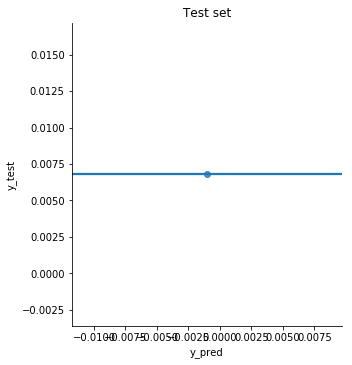

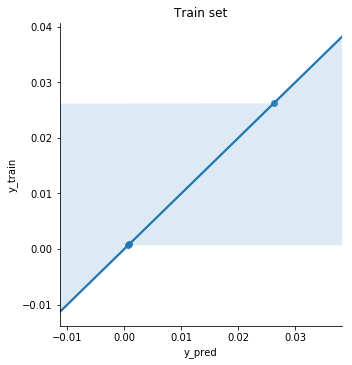

In [67]:
plot_performances(X_train, X_test, y_train, y_test)

Test R-squared: 0.0
Train R-squared: 0.9256519843236855


C:\Users\ekvtjdx\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


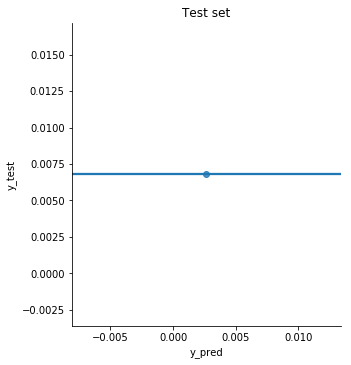

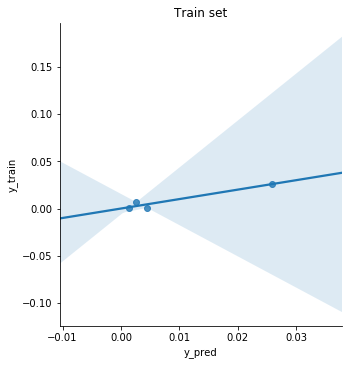

In [68]:
plot_performances(X, X_test, y, y_test)

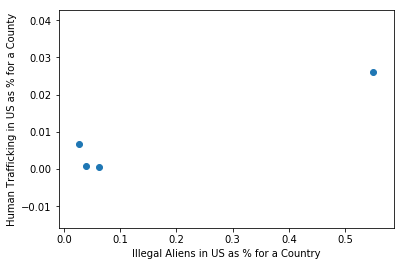

In [69]:
x1 = X['illeg_US_pcnt']
plt.scatter(x1, y)
plt.xlabel ('Illegal Aliens in US as % for a Country')
plt.ylabel ('Human Trafficking in US as % for a County')
plt.show()

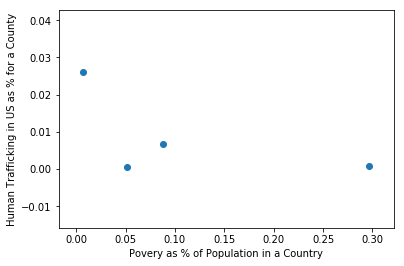

In [70]:
x2 = X['poverty_pop_pcnt']
plt.scatter(x2, y)
plt.xlabel ('Povery as % of Population in a Country')
plt.ylabel ('Human Trafficking in US as % for a County')
plt.show()

### Modeling section above not used - but Hackathon and external datasets used in POWER BI visualization

## SOURCES explored, and also used in visualization:   

### Illegal Alien stats:  www.dhs.gov/immigration-statistics# (Department of Homeland Security) 
### Population, Poverty, HDI, GDP, Battle Death stats:  www.gapminder.org/data/ (Gapminder World Data)